# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [10]:
import math
N = 10000
d = 10
selected_ads = []
number_of_selection = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_upper = 0
  for i in range(0,d):
    if (number_of_selection[i] > 0):
      avarage_reward = sum_of_rewards[i] / number_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selection[i])
      upper_bound = avarage_reward + delta_i
    else:
      upper_bound = 1e400

    if (upper_bound > max_upper):
      max_upper = upper_bound
      ad = i

  selected_ads.append(ad)
  number_of_selection[ad] += 1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

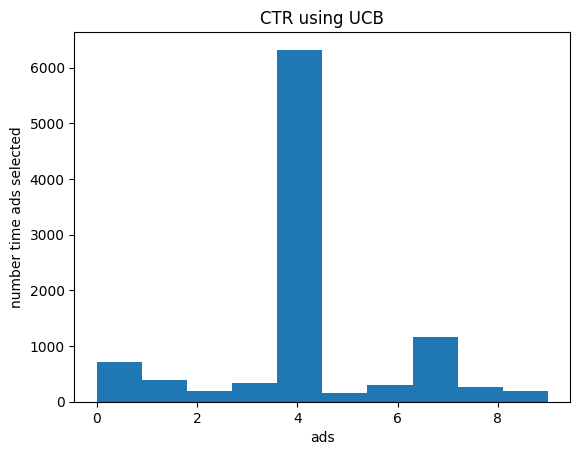

In [11]:
plt.hist(selected_ads)
plt.title("CTR using UCB")
plt.xlabel("ads")
plt.ylabel("number time ads selected")
plt.show()